# Download MySQL Installer
https://dev.mysql.com/downloads/installer/

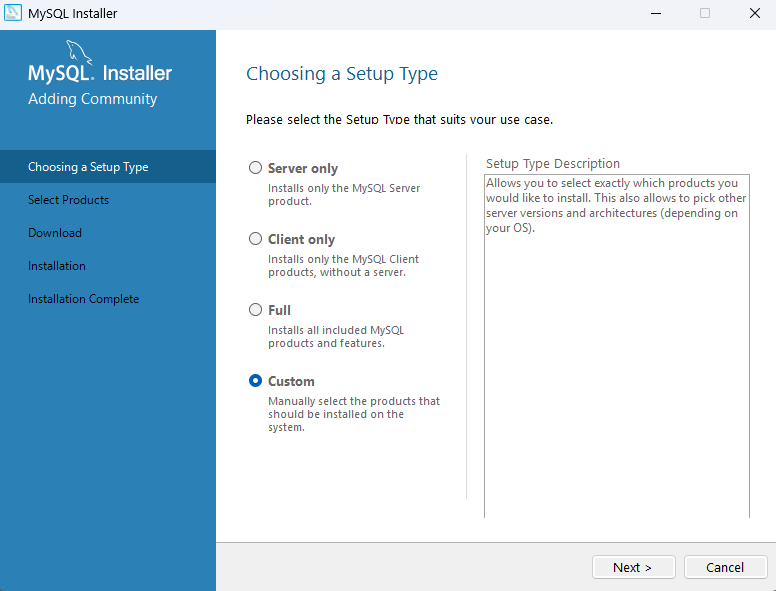
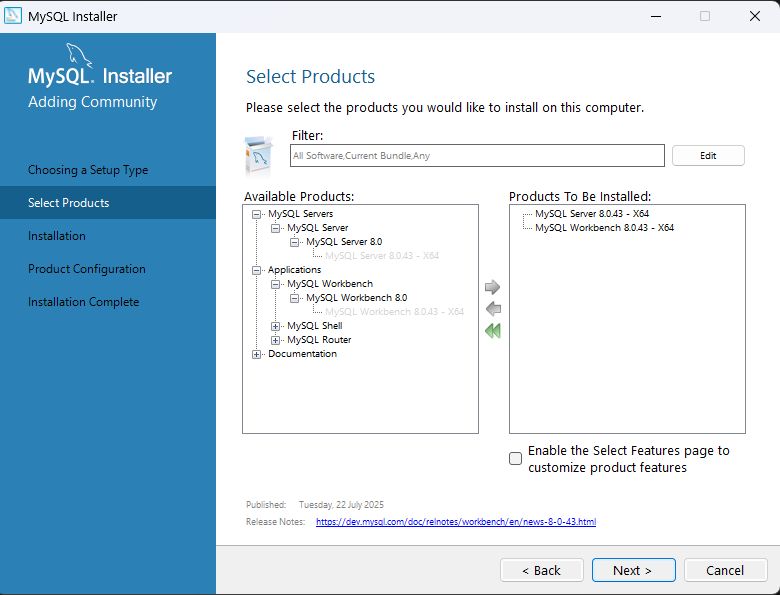
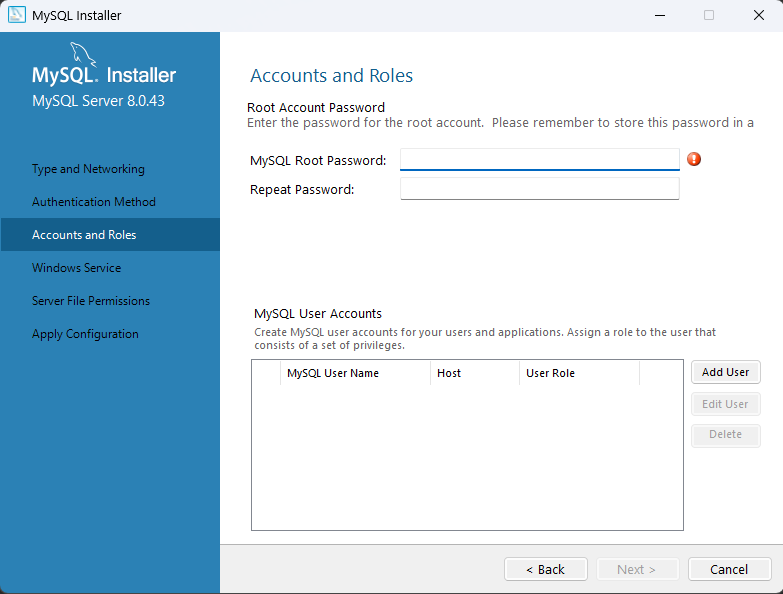
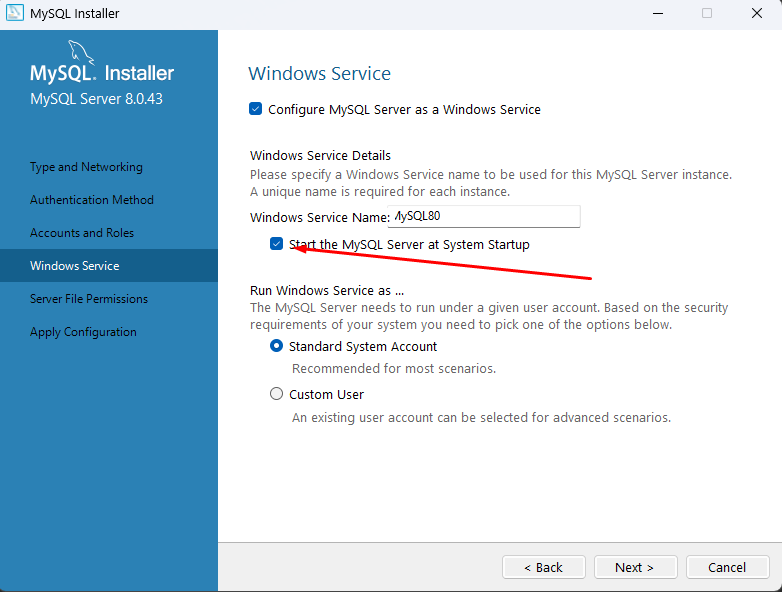


## Using not default ports ex: 3307

### Alternative 1
copy my.ini from C:\ProgramData\MySQL\MySQL Server 8.0\my.ini to C:\my.ini

### Alternative 2
```bash
PS C:\Users\User> mysql -u root -p --port=3307
```

### Alternative 3
```bash
PS C:\Users\User> mysql --defaults-file="C:\ProgramData\MySQL\MySQL Server 8.0\my.ini" -u root -p
Enter password: ********
Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 18
Server version: 8.0.43 MySQL Community Server - GPL

Copyright (c) 2000, 2025, Oracle and/or its affiliates.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

mysql>
```

In [146]:
import mysql.connector

try:
    conn = mysql.connector.connect(host='localhost',user='root',port=3307,password='inix2025')
    print("Connected")
except:
    print("Connection failed")
#conn.close()
cursor = conn.cursor()

Connected


In [67]:
# Check connection status
if conn.is_connected():
    print("Connection is open")
else:
    print("Connection is closed")

Connection is open


In [68]:
cursor.execute("select version()")
print(cursor.fetchone()[0])

8.0.43


In [69]:
def query(query):
    cursor.execute(query)
    result = cursor.fetchone()
    print(result[0])  # only prints first column of first row

In [70]:
query("select version()")

8.0.43


In [71]:
import pandas as pd

cursor.execute("select user, Host from mysql.user")

rows = cursor.fetchall()
columns = [col[0] for col in cursor.description]

df = DataFrame(rows, columns=columns)
pd.set_option('display.max_columns', None)
df


,user,Host
0,sapto,%
1,badu,localhost
2,mysql.infoschema,localhost
3,mysql.session,localhost
4,mysql.sys,localhost
5,root,localhost
6,tanpa_pw,localhost


In [60]:
cursor.execute("drop user 'sakti'@'localhost';")

In [61]:
cursor.execute("FLUSH PRIVILEGES;")

In [72]:
cursor.execute("SHOW DATABASES")

for schema in cursor:
    print(schema[0])

information_schema
mysql
performance_schema
pet
sys


In [83]:
cursor.execute("SELECT * FROM mysql.user")

rows = cursor.fetchall()
columns = [col[0] for col in cursor.description]

df = DataFrame(rows, columns=columns)
pd.set_option('display.max_columns', None)
df


,Host,User,Select_priv,Insert_priv,Update_priv,Delete_priv,Create_priv,Drop_priv,Reload_priv,Shutdown_priv,Process_priv,File_priv,Grant_priv,References_priv,Index_priv,Alter_priv,Show_db_priv,Super_priv,Create_tmp_table_priv,Lock_tables_priv,Execute_priv,Repl_slave_priv,Repl_client_priv,Create_view_priv,Show_view_priv,Create_routine_priv,Alter_routine_priv,Create_user_priv,Event_priv,Trigger_priv,Create_tablespace_priv,ssl_type,ssl_cipher,x509_issuer,x509_subject,max_questions,max_updates,max_connections,max_user_connections,plugin,authentication_string,password_expired,password_last_changed,password_lifetime,account_locked,Create_role_priv,Drop_role_priv,Password_reuse_history,Password_reuse_time,Password_require_current,User_attributes
0,%,sapto,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,,b'',b'',b'',0,0,0,0,caching_sha2_password,$A$005$%q:%jtB\n\rV O 3DFUvwF9RO73eO.fa61UEYoyMAJ3WWvwLecPJuWv4LP5YQ7,N,2025-07-24 22:12:26,None,N,N,N,None,None,None,None
1,localhost,badu,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,,b'',b'',b'',0,0,0,0,caching_sha2_password,"$A$005$|45N&VQWg""]y;hj\tNeqqjnL4S5KHraWdltR8qLvbUUhItJOf6mefi7Au7vV6",N,2025-07-26 23:42:49,None,N,Y,Y,None,None,None,None
2,localhost,mysql.infoschema,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,,b'',b'',b'',0,0,0,0,caching_sha2_password,$A$005$THISISACOMBINATIONOFINVALIDSALTANDPASSWORDTHATMUSTNEVERBRBEUSED,N,2025-07-24 22:12:22,None,Y,N,N,None,None,None,None
3,localhost,mysql.session,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,,b'',b'',b'',0,0,0,0,caching_sha2_password,$A$005$THISISACOMBINATIONOFINVALIDSALTANDPASSWORDTHATMUSTNEVERBRBEUSED,N,2025-07-24 22:12:22,None,Y,N,N,None,None,None,None
4,localhost,mysql.sys,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,,b'',b'',b'',0,0,0,0,caching_sha2_password,$A$005$THISISACOMBINATIONOFINVALIDSALTANDPASSWORDTHATMUSTNEVERBRBEUSED,N,2025-07-24 22:12:22,None,Y,N,N,None,None,None,None
5,localhost,root,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,,b'',b'',b'',0,0,0,0,caching_sha2_password,$A$005$^rz?/9i+?>%f@j_MsBIi0JP6Tpe9iafKlk0alLf5eleSX8gkFFc40/XEGCJ4,N,2025-07-24 22:12:26,None,N,Y,Y,None,None,None,None
6,localhost,tanpa_pw,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,,b'',b'',b'',0,0,0,0,caching_sha2_password,,N,2025-07-26 22:06:24,None,N,N,N,None,None,None,None


In [75]:
cursor.execute("SELECT authentication_string, User, Host FROM mysql.user")

rows = cursor.fetchall()
columns = [col[0] for col in cursor.description]

df = DataFrame(rows, columns=columns)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 
df

,authentication_string,User,Host
0,$A$005$%q:%jtB\n\rV O 3DFUvwF9RO73eO.fa61UEYoyMAJ3WWvwLecPJuWv4LP5YQ7,sapto,%
1,"$A$005$|45N&VQWg""]y;hj\tNeqqjnL4S5KHraWdltR8qLvbUUhItJOf6mefi7Au7vV6",badu,localhost
2,$A$005$THISISACOMBINATIONOFINVALIDSALTANDPASSWORDTHATMUSTNEVERBRBEUSED,mysql.infoschema,localhost
3,$A$005$THISISACOMBINATIONOFINVALIDSALTANDPASSWORDTHATMUSTNEVERBRBEUSED,mysql.session,localhost
4,$A$005$THISISACOMBINATIONOFINVALIDSALTANDPASSWORDTHATMUSTNEVERBRBEUSED,mysql.sys,localhost
5,$A$005$^rz?/9i+?>%f@j_MsBIi0JP6Tpe9iafKlk0alLf5eleSX8gkFFc40/XEGCJ4,root,localhost
6,,tanpa_pw,localhost


# Create and manage User

In [88]:
cursor.execute("select user();")
print(cursor.fetchone()[0])

root@localhost


In [90]:
cursor.execute("create user 'pengguna'@'localhost' identified by 'pw';")

In [91]:
cursor.execute("select host, User from mysql.user")

rows = cursor.fetchall()
columns = [col[0] for col in cursor.description]

df = DataFrame(rows, columns=columns)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 
df

,host,User
0,%,sapto
1,localhost,badu
2,localhost,mysql.infoschema
3,localhost,mysql.session
4,localhost,mysql.sys
5,localhost,pengguna
6,localhost,root
7,localhost,tanpa_pw


## Grant select and update privileges, can insert and etc.

In [92]:
cursor.execute("GRANT SELECT, UPDATE ON *.* TO 'pengguna'@'localhost';")

In [98]:
cursor.execute("SELECT * FROM mysql.user WHERE user='pengguna'")

rows = cursor.fetchall()
columns = [col[0] for col in cursor.description]

df = DataFrame(rows, columns=columns)
pd.set_option('display.max_columns', None)
df

,Host,User,Select_priv,Insert_priv,Update_priv,Delete_priv,Create_priv,Drop_priv,Reload_priv,Shutdown_priv,Process_priv,File_priv,Grant_priv,References_priv,Index_priv,Alter_priv,Show_db_priv,Super_priv,Create_tmp_table_priv,Lock_tables_priv,Execute_priv,Repl_slave_priv,Repl_client_priv,Create_view_priv,Show_view_priv,Create_routine_priv,Alter_routine_priv,Create_user_priv,Event_priv,Trigger_priv,Create_tablespace_priv,ssl_type,ssl_cipher,x509_issuer,x509_subject,max_questions,max_updates,max_connections,max_user_connections,plugin,authentication_string,password_expired,password_last_changed,password_lifetime,account_locked,Create_role_priv,Drop_role_priv,Password_reuse_history,Password_reuse_time,Password_require_current,User_attributes
0,localhost,pengguna,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,,b'',b'',b'',0,0,0,0,caching_sha2_password,$A$005$A.%^:]\thZo@B8vsoD8kYHzumPCpujJZzAzi08asVu0IwBFta5QW1SPO0rdi5,N,2025-07-27 00:11:37,None,N,N,N,None,None,None,None


In [147]:
def tampil_data():
    rows = cursor.fetchall()
    columns = [col[0] for col in cursor.description]

    df = DataFrame(rows, columns=columns)
    pd.set_option('display.max_columns', None)
    return df

In [104]:
cursor.execute("SELECT * FROM mysql.user WHERE user='pengguna'")
tampil_data()

,Host,User,Select_priv,Insert_priv,Update_priv,Delete_priv,Create_priv,Drop_priv,Reload_priv,Shutdown_priv,Process_priv,File_priv,Grant_priv,References_priv,Index_priv,Alter_priv,Show_db_priv,Super_priv,Create_tmp_table_priv,Lock_tables_priv,Execute_priv,Repl_slave_priv,Repl_client_priv,Create_view_priv,Show_view_priv,Create_routine_priv,Alter_routine_priv,Create_user_priv,Event_priv,Trigger_priv,Create_tablespace_priv,ssl_type,ssl_cipher,x509_issuer,x509_subject,max_questions,max_updates,max_connections,max_user_connections,plugin,authentication_string,password_expired,password_last_changed,password_lifetime,account_locked,Create_role_priv,Drop_role_priv,Password_reuse_history,Password_reuse_time,Password_require_current,User_attributes
0,localhost,pengguna,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,,b'',b'',b'',0,0,0,0,caching_sha2_password,$A$005$A.%^:]\thZo@B8vsoD8kYHzumPCpujJZzAzi08asVu0IwBFta5QW1SPO0rdi5,N,2025-07-27 00:11:37,None,N,N,N,None,None,None,None


## Grant All Privileges Like Root

In [105]:
cursor.execute("GRANT ALL PRIVILEGES ON *.* TO 'pengguna'@'localhost' WITH GRANT OPTION;")

In [106]:
cursor.execute("SELECT * FROM mysql.user WHERE user='pengguna'")
tampil_data()

,Host,User,Select_priv,Insert_priv,Update_priv,Delete_priv,Create_priv,Drop_priv,Reload_priv,Shutdown_priv,Process_priv,File_priv,Grant_priv,References_priv,Index_priv,Alter_priv,Show_db_priv,Super_priv,Create_tmp_table_priv,Lock_tables_priv,Execute_priv,Repl_slave_priv,Repl_client_priv,Create_view_priv,Show_view_priv,Create_routine_priv,Alter_routine_priv,Create_user_priv,Event_priv,Trigger_priv,Create_tablespace_priv,ssl_type,ssl_cipher,x509_issuer,x509_subject,max_questions,max_updates,max_connections,max_user_connections,plugin,authentication_string,password_expired,password_last_changed,password_lifetime,account_locked,Create_role_priv,Drop_role_priv,Password_reuse_history,Password_reuse_time,Password_require_current,User_attributes
0,localhost,pengguna,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,,b'',b'',b'',0,0,0,0,caching_sha2_password,$A$005$A.%^:]\thZo@B8vsoD8kYHzumPCpujJZzAzi08asVu0IwBFta5QW1SPO0rdi5,N,2025-07-27 00:11:37,None,N,Y,Y,None,None,None,None


## Rename User (pengguna → pengguna2)

In [108]:
cursor.execute("RENAME USER 'pengguna'@'localhost' TO 'pengguna2'@'localhost';")

In [109]:
cursor.execute("select host, User from mysql.user")
tampil_data()

,host,User
0,%,sapto
1,localhost,badu
2,localhost,mysql.infoschema
3,localhost,mysql.session
4,localhost,mysql.sys
5,localhost,pengguna2
6,localhost,root
7,localhost,tanpa_pw


## Change password

In [111]:
cursor.execute("ALTER USER 'pengguna2'@'localhost' IDENTIFIED BY 'pw2';")

## Detele User

In [113]:
cursor.execute("drop user 'pengguna2'@'localhost'")

In [114]:
cursor.execute("select host, User from mysql.user")
tampil_data()

,host,User
0,%,sapto
1,localhost,badu
2,localhost,mysql.infoschema
3,localhost,mysql.session
4,localhost,mysql.sys
5,localhost,root
6,localhost,tanpa_pw


---
---

# MySQL DATA TYPES
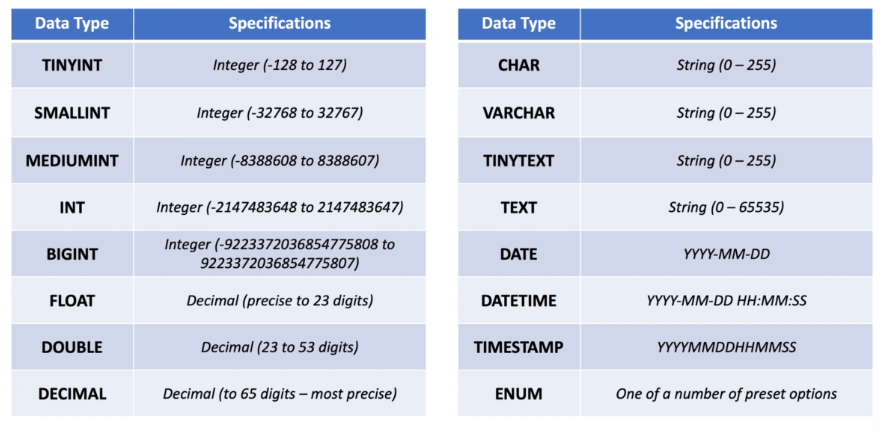

In [134]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS datatype_demo (
    id INT,
    name VARCHAR(50),
    description TEXT,
    short_note TINYTEXT,
    rating DECIMAL(3,1),
    price FLOAT,
    quantity INT,
    is_active TINYINT,
    created_at DATE
);
""")

In [135]:
cursor.execute("SHOW TABLES")
tampil_data()

,Tables_in_inixindo_surabaya
0,course_enrollment
1,courses
2,datatype_demo
3,inixindo_employee


In [136]:
cursor.execute("describe datatype_demo")
tampil_data()

,Field,Type,Null,Key,Default,Extra
0,id,int,YES,,None,
1,name,varchar(50),YES,,None,
2,description,text,YES,,None,
3,short_note,tinytext,YES,,None,
4,rating,"decimal(3,1)",YES,,None,
5,price,float,YES,,None,
6,quantity,int,YES,,None,
7,is_active,tinyint,YES,,None,
8,created_at,date,YES,,None,


In [137]:
cursor.execute("""
INSERT INTO datatype_demo (
    id, name, description, short_note, rating, price, quantity, is_active, created_at
) VALUES (
    1, 'Sample Item', 'This is a long description for the sample item.',
    'Note', 4.5, 123.45, 10, 1, '2024-07-27'
);
""")
conn.commit()


In [138]:
cursor.execute("select * from datatype_demo")
tampil_data()

,id,name,description,short_note,rating,price,quantity,is_active,created_at
0,1,Sample Item,This is a long description for the sample item.,Note,4.5,123.45,10,1,2024-07-27


In [139]:
cursor.execute("SELECT * FROM datatype_demo;")
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'Sample Item', 'This is a long description for the sample item.', 'Note', Decimal('4.5'), 123.45, 10, 1, datetime.date(2024, 7, 27))


# Lab_01
1. Create a new schema called **'inixindo_surabaya'**.
2. Add a table called **'courses'**, with two columns:
**'course_id'** (integer),**'course_title'** (string up to 65 characters).
3. Add another table called **'course_enrollments'**, with column:
**'course_id'** (integer),**'enrollment_date'** (date), **'revenue'** (decimal) representing how much was earned from enrollments that month.

---
---

In [116]:
cursor.execute("use inixindo_surabaya")

In [117]:
cursor.execute("select database()")
tampil_data()

,database()
0,inixindo_surabaya


In [120]:
cursor.execute("""
CREATE TABLE inixindo_employee (
    employee_id INT,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    position VARCHAR(50),
    hire_date DATE,
    hourly_wage DECIMAL(5,2)
);
""")

In [121]:
cursor.execute("describe inixindo_employee")
tampil_data()

,Field,Type,Null,Key,Default,Extra
0,employee_id,int,YES,,None,
1,first_name,varchar(50),YES,,None,
2,last_name,varchar(50),YES,,None,
3,position,varchar(50),YES,,None,
4,hire_date,date,YES,,None,
5,hourly_wage,"decimal(5,2)",YES,,None,


In [122]:
cursor.execute("INSERT INTO inixindo_employee VALUES (1, 'Alice', 'Johnson', 'Trainer', '2022-01-10', 35.50)")
cursor.execute("INSERT INTO inixindo_employee VALUES (2, 'Bob', 'Smith', 'Admin', '2021-12-01', 28.75)")
cursor.execute("INSERT INTO inixindo_employee VALUES (3, 'Charlie', 'Nguyen', 'Marketing', '2023-03-15', 31.00)")
cursor.execute("INSERT INTO inixindo_employee VALUES (4, 'Dina', 'Rahmawati', 'Support', '2020-08-20', 26.25)")
cursor.execute("INSERT INTO inixindo_employee VALUES (5, 'Eko', 'Santoso', 'Developer', '2022-11-05', 40.00)")

conn.commit()

In [123]:
cursor.execute("select * from inixindo_employee")
tampil_data()

,employee_id,first_name,last_name,position,hire_date,hourly_wage
0,1,Alice,Johnson,Trainer,2022-01-10,35.50
1,2,Bob,Smith,Admin,2021-12-01,28.75
2,3,Charlie,Nguyen,Marketing,2023-03-15,31.00
3,4,Dina,Rahmawati,Support,2020-08-20,26.25
4,5,Eko,Santoso,Developer,2022-11-05,40.00


# Lab_02 Altering tables
I have some basic tables set up in  **'inixindo_surabaya'** schema,
but I need some help updating some of the tables before employees can get access and start using this more widely.

1. Remove the **hourly_wage** column from the
employees table. (Need it hidden before share out)

2. Add a column to the employees table called
**'avg_customer_rating'** (decimal to one digit)

In [124]:
cursor.execute("ALTER TABLE inixindo_employee DROP COLUMN hourly_wage")

In [125]:
cursor.execute("select * from inixindo_employee")
tampil_data()

,employee_id,first_name,last_name,position,hire_date
0,1,Alice,Johnson,Trainer,2022-01-10
1,2,Bob,Smith,Admin,2021-12-01
2,3,Charlie,Nguyen,Marketing,2023-03-15
3,4,Dina,Rahmawati,Support,2020-08-20
4,5,Eko,Santoso,Developer,2022-11-05


In [127]:
cursor.execute("ALTER TABLE inixindo_employee ADD COLUMN avg_customer_rating DECIMAL(2,1);")

In [128]:
cursor.execute("select * from inixindo_employee")
tampil_data()

,employee_id,first_name,last_name,position,hire_date,avg_customer_rating
0,1,Alice,Johnson,Trainer,2022-01-10,None
1,2,Bob,Smith,Admin,2021-12-01,None
2,3,Charlie,Nguyen,Marketing,2023-03-15,None
3,4,Dina,Rahmawati,Support,2020-08-20,None
4,5,Eko,Santoso,Developer,2022-11-05,None


In [129]:
cursor.execute("describe inixindo_employee")
tampil_data()

,Field,Type,Null,Key,Default,Extra
0,employee_id,int,YES,,None,
1,first_name,varchar(50),YES,,None,
2,last_name,varchar(50),YES,,None,
3,position,varchar(50),YES,,None,
4,hire_date,date,YES,,None,
5,avg_customer_rating,"decimal(2,1)",YES,,None,


# Lab_03 Delete Table
1. Create copy from **inixindo_employee** table with table name **employee_old**
2. Delete table **employee_old**

In [130]:
cursor.execute("CREATE TABLE employee_old AS SELECT * FROM inixindo_employee")

In [131]:
cursor.execute("SHOW TABLES")
tampil_data()

,Tables_in_inixindo_surabaya
0,course_enrollment
1,courses
2,employee_old
3,inixindo_employee


In [132]:
cursor.execute("DROP TABLE employee_old")

In [133]:
cursor.execute("SHOW TABLES")
tampil_data()

,Tables_in_inixindo_surabaya
0,course_enrollment
1,courses
2,inixindo_employee
